IMPORTING PACKAGES (Package Offered (LPA))

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

IMPORTING THE DATASET

In [9]:
data=pd.read_csv('CPD.csv')
data.head()

,Serial No,Age,Gender,Stream,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA)
0,1,22,Female,Electronics And Communication,8,9,6,1,0,0,0
1,2,21,Female,Computer Science,7,8,9,0,1,1,7
2,3,22,Male,Information Technology,6,6,8,2,1,1,4
3,4,21,Female,Information Technology,8,9,9,2,0,1,12
4,5,22,Male,Mechanical,8,7,7,1,0,1,7


GENDER COLUMN BINARY CONVERSION

In [10]:
data['Gender'].replace(list(data['Gender'].unique()), range(len(data['Gender'].unique())), inplace=True)
data.head()

,Serial No,Age,Gender,Stream,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA)
0,1,22,0,Electronics And Communication,8,9,6,1,0,0,0
1,2,21,0,Computer Science,7,8,9,0,1,1,7
2,3,22,1,Information Technology,6,6,8,2,1,1,4
3,4,21,0,Information Technology,8,9,9,2,0,1,12
4,5,22,1,Mechanical,8,7,7,1,0,1,7


STREAM COLUMN DUMMY CODING

In [11]:
stream=pd.get_dummies(data['Stream'],drop_first=True)
data=pd.concat([data,stream],axis=1)
data.drop(['Stream'],axis=1,inplace=True)
data.head()

,Serial No,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,22,0,8,9,6,1,0,0,0,0,0,1,0,0
1,2,21,0,7,8,9,0,1,1,7,1,0,0,0,0
2,3,22,1,6,6,8,2,1,1,4,0,0,0,1,0
3,4,21,0,8,9,9,2,0,1,12,0,0,0,1,0
4,5,22,1,8,7,7,1,0,1,7,0,0,0,0,1


DATA NORMALIZATION

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Age', 'CGPA','Coding Skills','Communication Skills','Internships']
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,Serial No,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,0.2,0,0.75,1.0,0.4,0.5,0,0,0,0,0,1,0,0
1,2,0.1,0,0.50,0.8,1.0,0.0,1,1,7,1,0,0,0,0
2,3,0.2,1,0.25,0.4,0.8,1.0,1,1,4,0,0,0,1,0
3,4,0.1,0,0.75,1.0,1.0,1.0,0,1,12,0,0,0,1,0
4,5,0.2,1,0.75,0.6,0.6,0.5,0,1,7,0,0,0,0,1


SELECTING THE INSTANCES WHERE PLACEMENT OCCURS


In [12]:
data = data[data['PlacedOrNot']==1]

DATA SPLIT

In [13]:
x=data.drop(['PlacedOrNot','Package Offered (LPA)','Serial No'],axis=1)
y=data['Package Offered (LPA)']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=100)

LINEAR REGRESSION MODEL SCORE AND ERROR CALCULATION

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))

Training Data Score :  0.7009651596347319
Testing Data Score :  0.628828453325537


In [15]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error : ', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error : ', mse) 
mae= mean_absolute_error(ytest, ypred)
print('Mean absolute error : ', mae)

Root mean square error :  1.9044760208767786
Mean square error :  3.627028914094648
Mean absolute error :  1.591545194426184


DECISION TREE REGRESSOR MODEL SCORE AND ERROR CALCULATION


In [16]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print(f'Depth = {model.get_depth()}')

Training Data Score :  0.8938857241574762
Testing Data Score :  0.8472135648164499
Depth = 5


In [17]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error : ', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error : ', mse) 
mae= mean_absolute_error(ytest, ypred)
print('Mean absolute error : ', mae)

Root mean square error :  1.221885664515421
Mean square error :  1.493004577148292
Mean absolute error :  0.8499805537978654


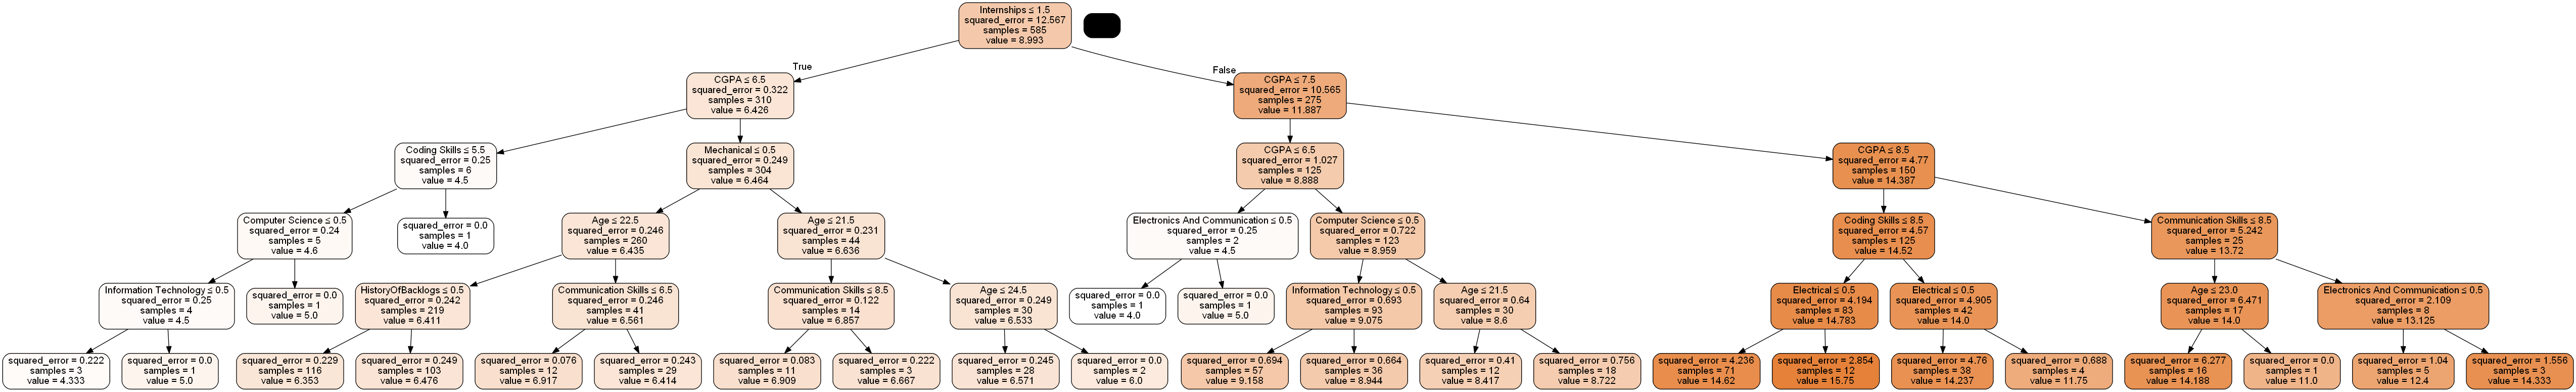

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(x.columns),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CPP-PkDt.png')
Image(graph.create_png())

RANDOM FOREST REGRESSOR MODEL SCORE AND ERROR CALCULATION


In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print(f'Estimators = {model.n_estimators}')

Training Data Score :  0.9623084992600177
Testing Data Score :  0.8628174686662642
Estimators = 100


In [30]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(ytest, ypred)
print('Mean absolute error', mae)

Root mean square error 1.1578107477313189
Mean square error 1.3405257275621558
Mean absolute error 0.8139195213799805


In [31]:

df=pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df

,Actual,Predicted
284,7,6.373333
719,7,6.105000
28,7,6.330000
796,7,6.317286
1186,7,6.260000
...,...,...
972,15,14.343333
559,8,9.640000
69,7,6.890000
1212,11,12.999833


STORING THE MODEL

In [74]:
import pickle
pickle.dump(model,open('Package.pkl','wb'))